In [1]:
from linares_plot import *
import sys, os
import statsmodels.formula.api as smf
path_tools = 'C:\\Users\\David\\Documents\\GitHub\\encoding\\scripts\\wm_representation\\functions\\IEM\\tools'
sys.path.insert(1, path_tools)
from timecourse import *
from timecourse_c import *

In [10]:
%load_ext autoreload
%autoreload 2

In [11]:
from timecourse_c import *

ImportError: No module named 'timecourse_c'

## ¿Cómo decodifico mejor el target: entrenando en el target o en el distractor?

In [2]:
## comment one of the following cells. 
## I make the timecourse just once (repeated in the files "Target_decoding_leaveRUNout_responded" and "Target_decoding_leaveRUNout") 
## I keep the "final" decoding target plot for both. In one it says taregt resp. and in the other it says just target

In [3]:
### targets (responded y no responded)
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_runsout.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testT_runsout.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_runsout.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testT_runsout.xlsx']

In [4]:
### targets "responded"
# paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testT_resp.xlsx', 
#                'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testT_resp.xlsx']

# paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testT_resp.xlsx', 
#                      'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testT_resp.xlsx']

In [5]:
df_target=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_target_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target.append(df_x)
    
#
df_target=pd.concat(df_target, axis=0)
df_target['decoding_item'] = df_target['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target['training_item'] = df_target['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_target_shuff.append(df_x)
    
#
df_target_shuff=pd.concat(df_target_shuff, axis=0)
df_target_shuff['decoding_item'] = df_target_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_target_shuff['training_item'] = df_target_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [6]:
df = df_target
df_shuff = df_target_shuff

df_time_target=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='target'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    #decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    df_time_target.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
#
df_time_target = pd.DataFrame(df_time_target)
df_time_target.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']

In [9]:
from timecourse_c import *

ImportError: No module named 'timecourse_c'

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


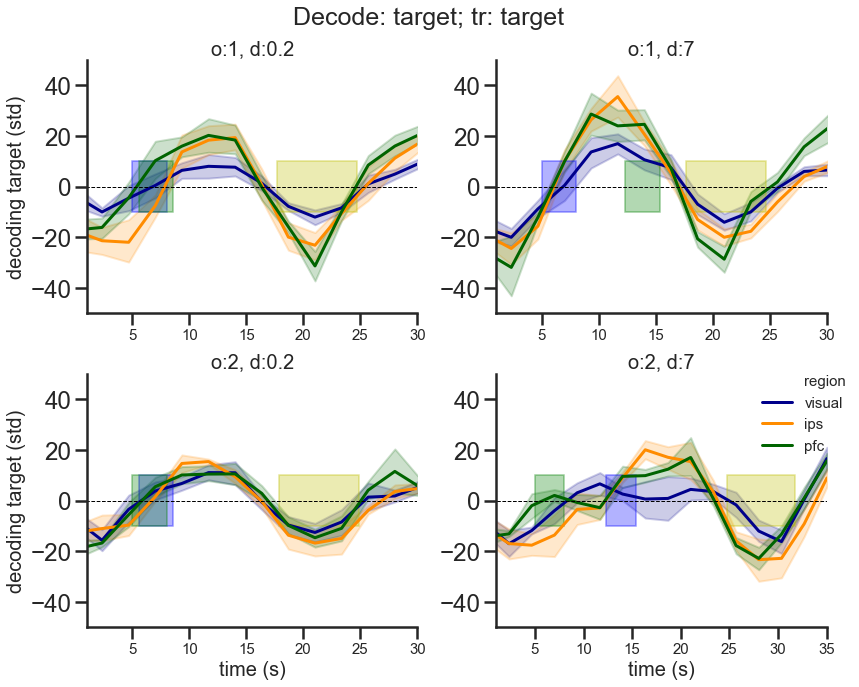

In [8]:
df_x = df_time_target.loc[df_time_target['training_item']=='target']
tiemcourse(df_x , 'Decode: target; tr: target', ylims=[-50,50])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


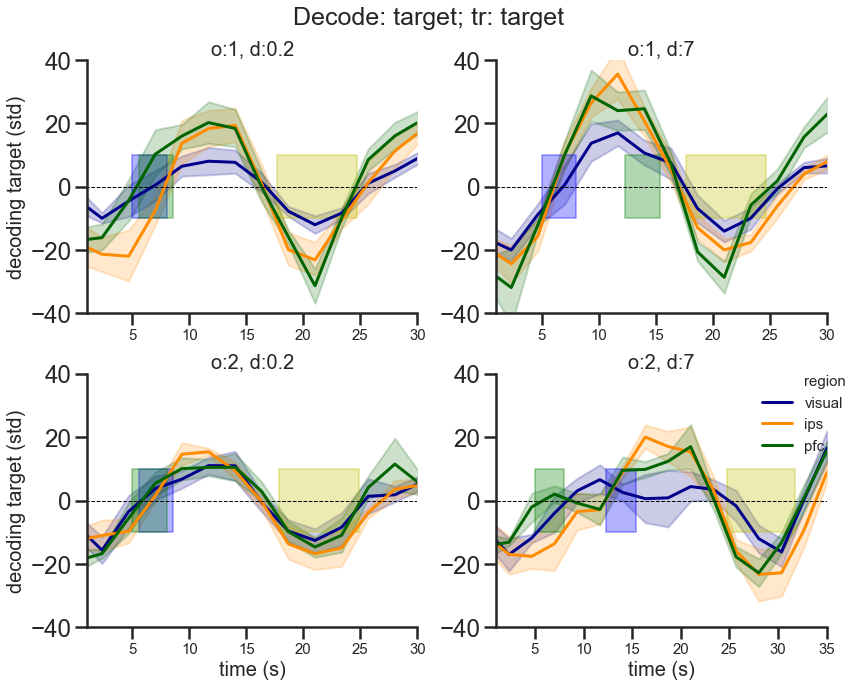

In [5]:
df_x = df_time_target.loc[df_time_target['training_item']=='target']
tiemcourse(df_x , 'Decode: target; tr: target', ylims=[-40,40])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


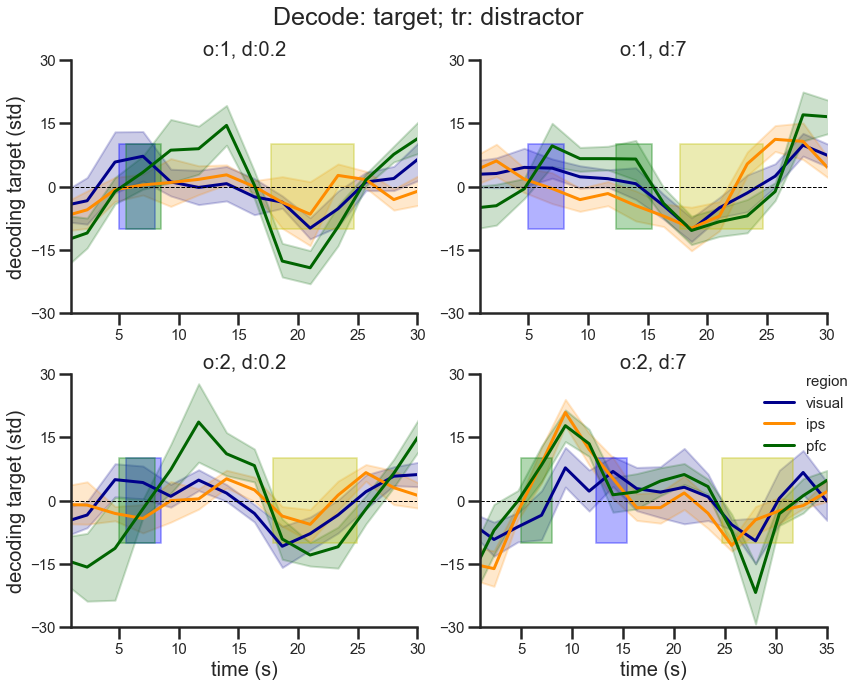

In [8]:
df_x = df_time_target.loc[df_time_target['training_item']=='distractor']
tiemcourse(df_x , 'Decode: target; tr: distractor', ylims=[-30,30])

##### Juntar todos los TRs de delay de target en cada condición

In [7]:
df_time_target.head()

,times,decoding,region,subject,condition,label,training_item,decoding_item
0,0.000,-5.869275,visual,d001,1_0.2,signal,target,target
1,2.335,-10.863913,visual,d001,1_0.2,signal,target,target
2,4.670,-9.592145,visual,d001,1_0.2,signal,target,target
3,7.005,-2.293832,visual,d001,1_0.2,signal,target,target
4,9.340,21.483690,visual,d001,1_0.2,signal,target,target


In [8]:
c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 14.01) )]

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & 
                   ( (df_time_target['times']>= 16.345) & (df_time_target['times']<= 23.35) )]



df_target_target = pd.concat([c1_02, c1_7, c2_02, c2_7])

In [9]:
df_target_target.head()

,times,decoding,region,subject,condition,label,training_item,decoding_item
4,9.340,21.483690,visual,d001,1_0.2,signal,target,target
5,11.675,15.006981,visual,d001,1_0.2,signal,target,target
6,14.010,7.110839,visual,d001,1_0.2,signal,target,target
7,16.345,-3.282488,visual,d001,1_0.2,signal,target,target
20,9.340,5.416728,visual,d001,1_0.2,signal,distractor,target


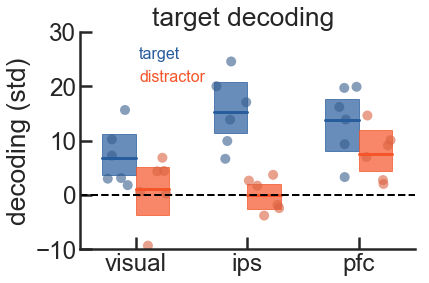

In [34]:
linares_plot(x='region', y='decoding', hue='training_item', order=['visual', 'ips', 'pfc'], 
             hue_order=['target', 'distractor'],
            df=df_target_target, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
plt.gca().set_ylim(-10,30)
plt.gca().set_yticks([-10,0,10,20,30])
plt.title('target decoding ')
plt.show()


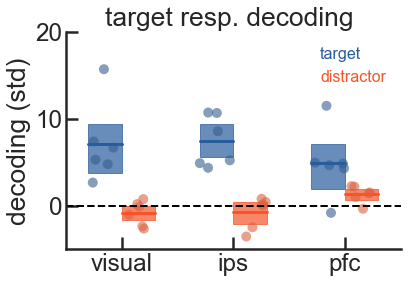

In [27]:
#responded
linares_plot(x='region', y='decoding', hue='training_item', order=['visual', 'ips', 'pfc'], 
             hue_order=['target', 'distractor'],
            df=df_target_target, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([0,10,20])
plt.title('target resp. decoding ')
plt.show()


In [18]:
### 1-WE CAN DECODE THE TARGET DURING THE DELAY PERIOD IN ALL THE REGIONS!! (no te olvides de esto please...)
###
### Decoding the target trainig on the distractor is just possible in PFC! 
### Two alternatives here: 
###     1- Visual and IPS have a "sensory based" code por lo que necesiatn el "mejor código posible"
###     2- Visual and IPS tienen dos codigos distintos para target y distractor (saben distinguir)

## Si 1, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el target
## Si 2, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el distractor

#### En responded tambien tenemos el mismo resultado (menos fuerte, probablemente porque el testing está hecho en muchos menos trials)

## ¿Cómo decodifico mejor el distractor: entrenando en el target o en el distractor?


In [7]:
##distractors (responded-closest o no responded)
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_runsout.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD_runsout.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_runsout.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD_runsout.xlsx']


In [51]:
## distractors "responded" (closest)
paths_target=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainT_testD_resp.xlsx', 
               'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\IEM_trainD_testD_resp.xlsx']

paths_target_shuff=[ 'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainT_testD_resp.xlsx', 
                     'C:\\Users\\David\\Desktop\\KI_Desktop\\data_reconstructions\\IEM\\shuff_IEM_trainD_testD_resp.xlsx']

In [52]:
df_distractor=[] ##target ha sido entrenado en el delay del distractor y viceversa
df_distractor_shuff=[]

for PathI in paths_target:
    path_save_signal =PathI
    #
    decoding_item= path_save_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    training_item = path_save_signal.split('\\')[-1].split('.')[0].split('_')[1][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor.append(df_x)
    
#
df_distractor=pd.concat(df_distractor, axis=0)
df_distractor['decoding_item'] = df_distractor['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor['training_item'] = df_distractor['training_item'].replace(['T', 'D'], ['target', 'distractor'])


####################

for PathI in paths_target_shuff:
    path_sh_signal =PathI
    #
    decoding_item= path_sh_signal.split('\\')[-1].split('.')[0].split('_')[3][-1]
    training_item = path_sh_signal.split('\\')[-1].split('.')[0].split('_')[2][-1]
    #
    df_x = pd.read_excel(PathI)
    df_x['decoding_item'] = decoding_item
    df_x['training_item'] =training_item
    
    #
    df_distractor_shuff.append(df_x)
    
#
df_distractor_shuff=pd.concat(df_distractor_shuff, axis=0)
df_distractor_shuff['decoding_item'] = df_distractor_shuff['decoding_item'].replace(['T', 'D'], ['target', 'distractor'])
df_distractor_shuff['training_item'] = df_distractor_shuff['training_item'].replace(['T', 'D'], ['target', 'distractor'])

In [53]:
df = df_distractor
df_shuff = df_distractor_shuff

df_time_distractor=[]


for cond in ['1_0.2','1_7', '2_0.2', '2_7']:
    for reg in ['visual', 'ips', 'pfc']:
        for subj in ['d001', 's001', 'l001', 'n001', 'b001', 'r001']:
            for training_item in ['target', 'distractor']:
                for t in df.times.unique(): 
                    #
                    decoding_item='distractor'
                    #
                    dec_sig = df.loc[(df['region']==reg) & (df['times']== t) & 
                           ( df['condition']==cond) & (df['subject']==subj) &  
                           ( df['training_item']==training_item) & 
                           ( df['decoding_item']== decoding_item)]
                    #
                    dec_shuff = df_shuff.loc[(df_shuff['region']==reg) & (df_shuff['times']== t) & 
                           ( df_shuff['condition']==cond) & (df_shuff['subject']==subj) &  
                           ( df_shuff['training_item']==training_item)  & 
                           ( df_shuff['decoding_item']== decoding_item) ].decoding
                    #
                    decoding_ = (dec_sig.decoding.iloc[0]  - dec_shuff.mean()) / dec_shuff.std()
                    #decoding_ = dec_sig.decoding.iloc[0]  - dec_shuff.mean()
                    df_time_distractor.append( [t, decoding_, reg, subj, cond, dec_sig.label.iloc[0], training_item, decoding_item] )   
                    ####)
#
df_time_distractor = pd.DataFrame(df_time_distractor)
df_time_distractor.columns=['times', 'decoding', 'region', 'subject', 'condition', 'label', 'training_item', 'decoding_item']

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


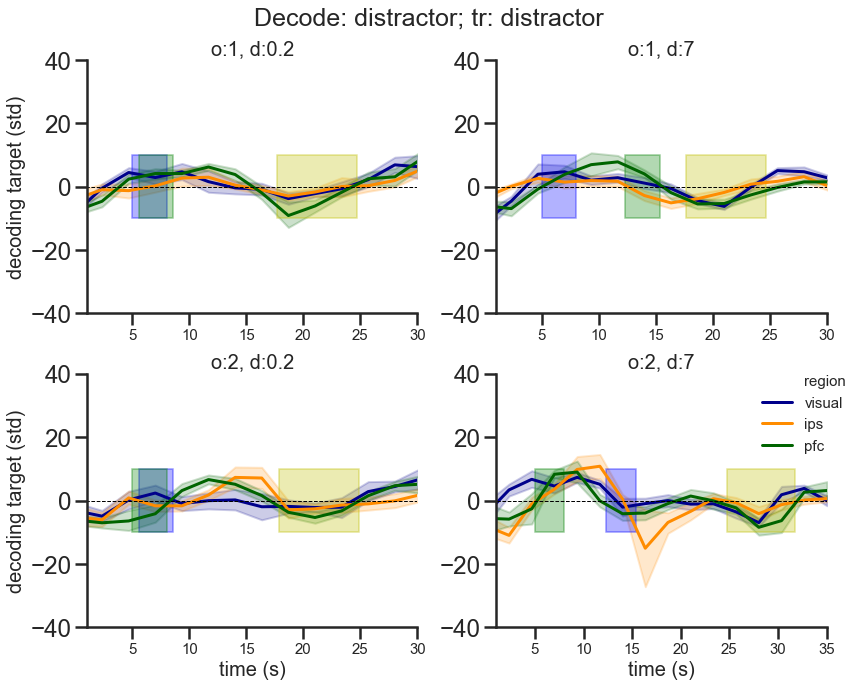

In [62]:
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='distractor']
tiemcourse(df_x , 'Decode: distractor; tr: distractor', ylims=[-40,40])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


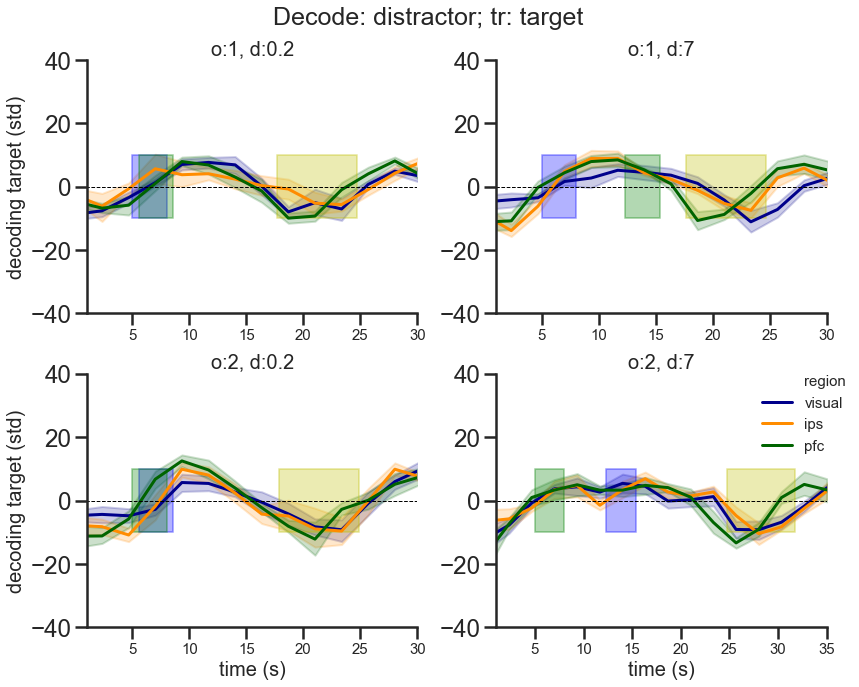

In [63]:
df_x = df_time_distractor.loc[df_time_distractor['training_item']=='target']
tiemcourse(df_x , 'Decode: distractor; tr: target', ylims=[-40,40])

##### Juntar todos los TRs de delay de distractor en cada condición


In [14]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & 
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]

c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 11.675) )]



df_distractor_distractor = pd.concat([c1_02, c1_7, c2_02, c2_7])

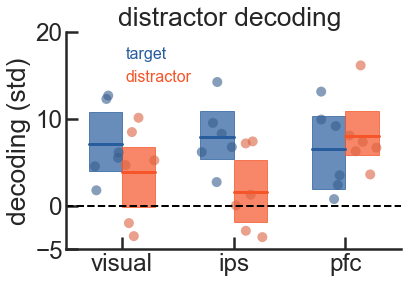

In [53]:
linares_plot(x='region', y='decoding', hue='training_item', order=['visual', 'ips', 'pfc'], 
             hue_order=['target', 'distractor'],
            df=df_distractor_distractor, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
plt.gca().set_ylim(-5,20)
plt.gca().set_yticks([-5,0,10,20])
plt.title('distractor decoding ')
plt.show()

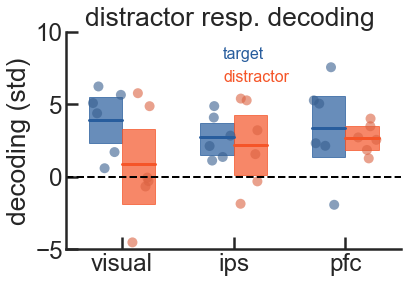

In [43]:
#responded
linares_plot(x='region', y='decoding', hue='training_item', order=['visual', 'ips', 'pfc'], 
             hue_order=['target', 'distractor'],
            df=df_distractor_distractor, 
            palette=['#285d9d', '#f55528'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
plt.gca().set_ylim(-5,10)
plt.gca().set_yticks([-5,0,5,10])
plt.title('distractor resp. decoding ')
plt.show()


In [ ]:
### 1-WE CAN DECODE THE DISTRACTOR DURING THE DELAY PERIOD IN ALL THE REGIONS!!
###
### Decoding the distractor trainig on the distractor is just possible in PFC! 
### En visual y en IPS se decodifica cuando entreno en el target. 
### En el punto anterior (decoding target) vimos estas dos alternativas
###     1- Visual and IPS have a "sensory based" code por lo que necesiatn el "mejor código posible"
###     2- Visual and IPS tienen dos codigos distintos para target y distractor (saben distinguir)

## Si 1, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el target
## Si 2, entonces cuando intente decodificar el distractor, lo harán mejor entrenando en el distractor

#### El resultado es inequívoco (1), no distinguen el distractor y es sensory based
#### El resultado de IPS sugiere que target y distractor comparten el mismo código, como se postula en el Bump attractor model

## Decoding in order 1 vs order 2
#### always training on the target

In [11]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]


df_distractor_o1 = pd.concat([c1_02, c1_7])

c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 11.675)  )]


df_target_o1 = pd.concat([c1_02, c1_7])

o1_compar = pd.concat([df_distractor_o1, df_target_o1 ])
o1_compar['order']=1

In [12]:
c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34 ) & (df_time_distractor['times']<= 11.675 ) )]


df_distractor_o2 = pd.concat([c2_02, c2_7])

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 14.01) & (df_time_target['times']<= 18.68)  )]


df_target_o2 = pd.concat([c2_02, c2_7])

o2_compar = pd.concat([df_distractor_o2, df_target_o2 ])
o2_compar['order']=2

In [13]:
o1_o2_comp = pd.concat([o1_compar, o2_compar])

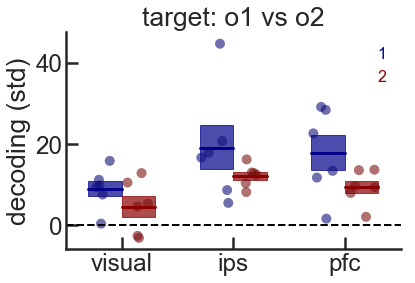

In [25]:
linares_plot(x='region', y='decoding', hue='order', order=['visual', 'ips', 'pfc'], 
             hue_order=[1,2],
            df=o1_o2_comp.loc[o1_o2_comp['decoding_item']=='target'], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('target: o1 vs o2')
plt.show()

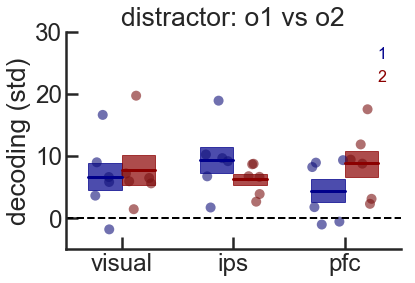

In [26]:
linares_plot(x='region', y='decoding', hue='order', order=['visual', 'ips', 'pfc'], 
             hue_order=[1,2],
            df=o1_o2_comp.loc[o1_o2_comp['decoding_item']=='distractor'], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('distractor: o1 vs o2')
plt.show()

In [ ]:
##makes sense,

## Decoding in short vs long delay
#### always training on the target

In [16]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]

c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & (df_time_distractor['training_item']=='target') &
                   ((df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345))]


df_distractor_d02 = pd.concat([c1_02, c2_02])

c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345)  )]


df_target_d02 = pd.concat([c1_02, c2_02])

d02_compar = pd.concat([df_distractor_d02, df_target_d02 ])
d02_compar['delay']=0.2

In [17]:
c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & (df_time_distractor['training_item']=='target') &
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & (df_time_distractor['training_item']=='target') &
                   ((df_time_distractor['times']>= 9.34 ) & (df_time_distractor['times']<= 11.675 ) )]


df_distractor_d7 = pd.concat([c1_7, c2_7])

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 9.34 ) & (df_time_target['times']<= 11.675 )  )]

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & (df_time_target['training_item']=='target') &
                   ( (df_time_target['times']>= 14.01) & (df_time_target['times']<= 18.68)  )]


df_target_d7 = pd.concat([c1_7, c2_7])

d7_compar = pd.concat([df_distractor_d7, df_target_d7 ])
d7_compar['delay']=7

In [20]:
d02_d7_comp = pd.concat([d02_compar, d7_compar])

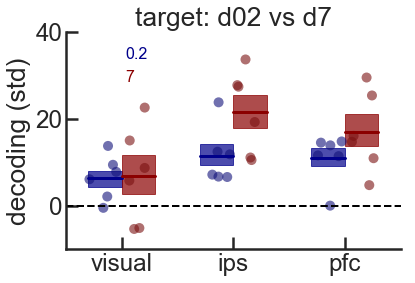

In [29]:
linares_plot(x='region', y='decoding', hue='delay', order=['visual', 'ips', 'pfc'], 
             hue_order=[0.2, 7],
            df=d02_d7_comp.loc[d02_d7_comp['decoding_item']=='target'], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
plt.gca().set_ylim(-10,40)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('target: d02 vs d7')
plt.show()

In [ ]:
##makes sense! en la condición fácil (delay 7) decodifico mejor el target pero eso solo en ips y pfc
## en el beh específico de fmri, el mayor efecto era de SOA, no de order

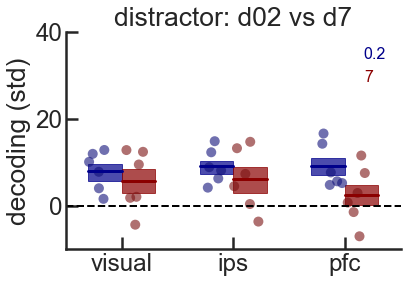

In [30]:
linares_plot(x='region', y='decoding', hue='delay', order=['visual', 'ips', 'pfc'], 
             hue_order=[0.2, 7],
            df=d02_d7_comp.loc[d02_d7_comp['decoding_item']=='distractor'], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('distractor: d02 vs d7')
plt.gca().set_ylim(-10,40)
plt.show()

In [ ]:
##makes sense" en la condición fácil es cuando menos decodifico el distractor en pfc (mayor diferencecia entre 02 y 7 en pfc)
## en el beh específico de fmri, el mayor efecto era de SOA, no de order

# SOA: Distractor decoding
### El efecto de SOA está presente en el behaviour! (más distractor para short SOA)
Hay dos preguntas a resolver:  
   ***1- qué area muestra este efecto de SOA??  
   2- el efecto de SOA es debido a un "boost" del target o a una supression del distractor?***

In [54]:
c1_02 = df_time_distractor.loc[(df_time_distractor['condition']=='1_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'distractor'

c1_7 = df_time_distractor.loc[(df_time_distractor['condition']=='1_7') & 
                   ( (df_time_distractor['times']>= 14.01) & (df_time_distractor['times']<= 18.68) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'distractor'

c2_02 = df_time_distractor.loc[(df_time_distractor['condition']=='2_0.2') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'distractor'

c2_7 = df_time_distractor.loc[(df_time_distractor['condition']=='2_7') & 
                   ( (df_time_distractor['times']>= 9.34) & (df_time_distractor['times']<= 11.675) )]
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'distractor'

conditions_dist = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

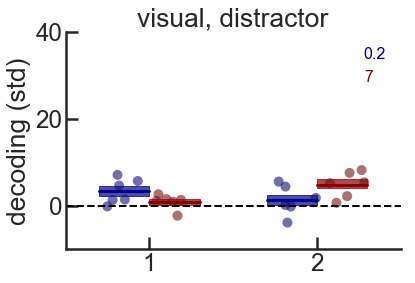

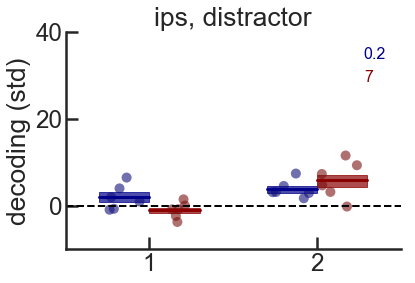

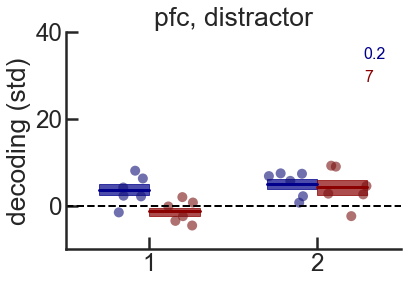

In [67]:
linares_plot(x='order', y='decoding', hue='delay', order=[1, 2], 
             hue_order=[0.2, 7],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['region']=='visual')], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('visual, distractor')
plt.gca().set_ylim(-10,40)
plt.show()


linares_plot(x='order', y='decoding', hue='delay', order=[1, 2], 
             hue_order=[0.2, 7],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['region']=='ips')], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('ips, distractor')
plt.gca().set_ylim(-10,40)
plt.show()

linares_plot(x='order', y='decoding', hue='delay', order=[1, 2], 
             hue_order=[0.2, 7],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor') & (conditions_dist['region']=='pfc')], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('pfc, distractor')
plt.gca().set_ylim(-10,40)
plt.show()

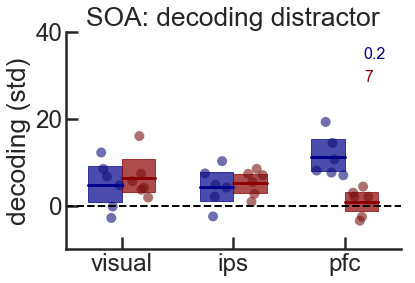

In [46]:
linares_plot(x='region', y='decoding', hue='delay', hue_order=[0.2, 7], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor')], 
            palette=['darkblue', 'darkred'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('SOA: decoding distractor')
plt.gca().set_ylim(-10,40)
plt.show()


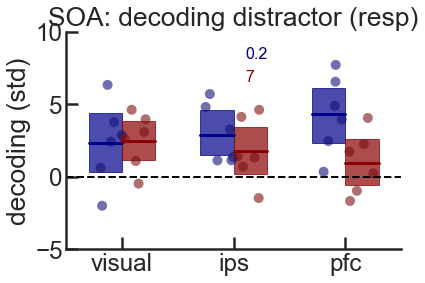

In [60]:
linares_plot(x='region', y='decoding', hue='delay', hue_order=[0.2, 7], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_dist.loc[(conditions_dist['deco']=='distractor')], 
            palette=['darkblue', 'darkred'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('SOA: decoding distractor (resp)')
plt.gca().set_ylim(-5,10)
plt.show()

In [65]:
conditions_dist['region_'] = conditions_dist['region'].replace(['visual', 'ips', 'pfc'], ['a_visual', 'ips', 'pfc'])

res_m = smf.mixedlm(formula='decoding ~ region_ * delay', data=conditions_dist.loc[(conditions_dist['deco']=='distractor')],
                    groups=conditions_dist.loc[(conditions_dist['deco']=='distractor'), 'subject']).fit()
print(res_m.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   decoding  
No. Observations:    468       Method:               REML      
No. Groups:          6         Scale:                49.6619   
Min. group size:     78        Likelihood:           -1577.7733
Max. group size:     78        Converged:            Yes       
Mean group size:     78.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             2.334    0.792  2.948 0.003  0.782  3.885
region_[T.ips]        0.605    1.048  0.577 0.564 -1.449  2.659
region_[T.pfc]        2.090    1.048  1.995 0.046  0.037  4.144
delay                 0.022    0.171  0.132 0.895 -0.312  0.357
region_[T.ips]:delay -0.187    0.241 -0.776 0.438 -0.660  0.286
region_[T.pfc]:delay -0.519    0.241 -2.152 0.031 -0.

***pfc muestra un efecto de SOA mas en la linea de lo que se ve en performance, 
con mayor presencia del distractor en la condición que distrae más.***  

***Ahora falta ver si esto es por un "target boost" además de por la distractor supression que hemos visto***

# SOA: Target decoding
### El efecto de SOA está presente en el behaviour! a ver qué area muetsra esto mejor

In [57]:
c1_02 = df_time_target.loc[(df_time_target['condition']=='1_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c1_02['order']=1
c1_02['delay']=0.2
c1_02['deco'] = 'target'

c1_7 = df_time_target.loc[(df_time_target['condition']=='1_7') & 
                   ( (df_time_target['times']>= 9.34 ) & (df_time_target['times']<= 11.675 ) )]
c1_7['order']=1
c1_7['delay']=7
c1_7['deco'] = 'target'

c2_02 = df_time_target.loc[(df_time_target['condition']=='2_0.2') & 
                   ( (df_time_target['times']>= 9.34) & (df_time_target['times']<= 16.345) )]
c2_02['order']=2
c2_02['delay']=0.2
c2_02['deco'] = 'target'

c2_7 = df_time_target.loc[(df_time_target['condition']=='2_7') & 
                   ( (df_time_target['times']>= 14.01) & (df_time_target['times']<= 18.68) )]
c2_7['order']=2
c2_7['delay']=7
c2_7['deco'] = 'target'

conditions_target = pd.concat([c1_02, c1_7, c2_02, c2_7 ])

C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\David\Anaconda3\envs\python3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a cop

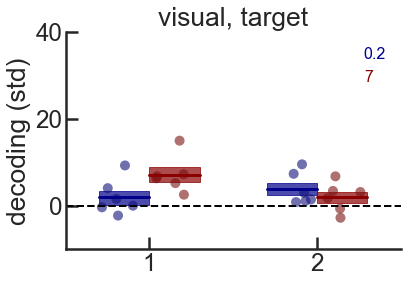

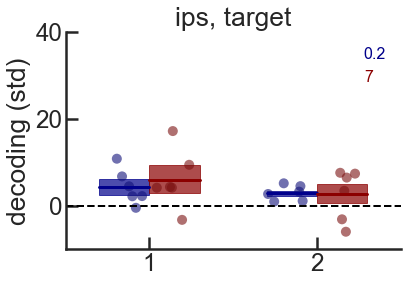

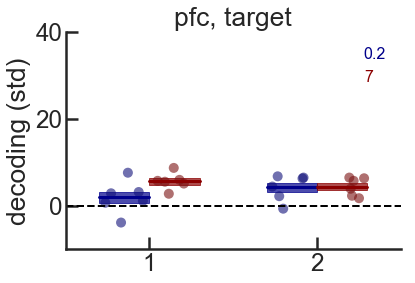

In [58]:
linares_plot(x='order', y='decoding', hue='delay', order=[1, 2], 
             hue_order=[0.2, 7],
            df=conditions_target.loc[(conditions_target['deco']=='target') & (conditions_target['region']=='visual')], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('visual, target')
plt.gca().set_ylim(-10,40)
plt.show()


linares_plot(x='order', y='decoding', hue='delay', order=[1, 2], 
             hue_order=[0.2, 7],
            df=conditions_target.loc[(conditions_target['deco']=='target') & (conditions_target['region']=='ips')], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('ips, target')
plt.gca().set_ylim(-10,40)
plt.show()

linares_plot(x='order', y='decoding', hue='delay', order=[1, 2], 
             hue_order=[0.2, 7],
            df=conditions_target.loc[(conditions_target['deco']=='target') & (conditions_target['region']=='pfc')], 
            palette=['darkblue', 'darkred'], CI=0.68,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=100, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('pfc, target')
plt.gca().set_ylim(-10,40)
plt.show()

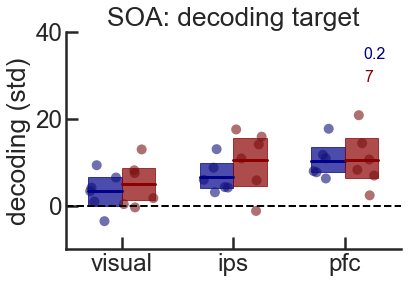

In [47]:
linares_plot(x='region', y='decoding', hue='delay', hue_order=[0.2, 7], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_target.loc[(conditions_target['deco']=='target')], 
            palette=['darkblue', 'darkred'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('SOA: decoding target')
plt.gca().set_ylim(-10,40)
plt.show()

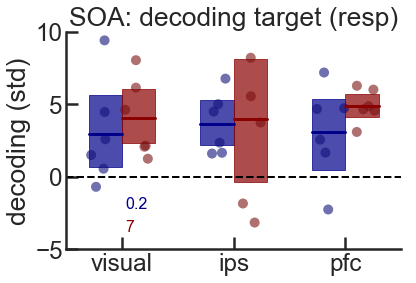

In [61]:
linares_plot(x='region', y='decoding', hue='delay', hue_order=[0.2, 7], 
             order=['visual', 'ips', 'pfc'],
            df=conditions_target.loc[(conditions_target['deco']=='target')], 
            palette=['darkblue', 'darkred'], CI=0.95,  fill_box=True, by_subj=True, subj_col='subject', 
             reps=1000, alpha_box=0.7, alpha=0.6,  point_size=10, leg=True, sep_axis=False)
plt.gca().spines['right'].set_visible(False)  # aesthetics                                                                              # remove right spines
plt.gca().spines['top'].set_visible(False)                                                                                  # remove top spines
plt.gca().get_xaxis().tick_bottom()                                                                                         
plt.gca().get_yaxis().tick_left()
plt.gca().tick_params(direction='in') #direction
plt.xlabel('')
plt.plot([-0.5,2.5], [0,0], 'k--', linewidth=2)
plt.ylabel('decoding (std)')# (std. dist.)')
#plt.gca().set_ylim(-5,30)
#plt.gca().set_yticks([-5,0,5,10])
plt.title('SOA: decoding target (resp)')
plt.gca().set_ylim(-5,10)
plt.show()

In [66]:
conditions_target['region_'] = conditions_target['region'].replace(['visual', 'ips', 'pfc'], ['a_visual', 'ips', 'pfc'])

res_m = smf.mixedlm(formula='decoding ~ region_ * delay', data=conditions_target.loc[(conditions_target['deco']=='target')],
                    groups=conditions_target.loc[(conditions_target['deco']=='target'), 'subject']).fit()
print(res_m.summary())

             Mixed Linear Model Regression Results
Model:               MixedLM   Dependent Variable:   decoding  
No. Observations:    468       Method:               REML      
No. Groups:          6         Scale:                58.4103   
Min. group size:     78        Likelihood:           -1617.9852
Max. group size:     78        Converged:            Yes       
Mean group size:     78.0                                      
---------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------------
Intercept             2.943    1.080  2.726 0.006  0.827  5.059
region_[T.ips]        0.699    1.136  0.615 0.538 -1.528  2.926
region_[T.pfc]        0.102    1.136  0.090 0.929 -2.125  2.329
delay                 0.158    0.185  0.855 0.393 -0.204  0.521
region_[T.ips]:delay -0.108    0.262 -0.413 0.680 -0.621  0.405
region_[T.pfc]:delay  0.109    0.262  0.416 0.677 -0.

***The effect of distraction seems a consequance of atenuating the distractor instead of increasing the target representation***